In [3]:
## libraries needs to run the script ##
import os
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [4]:
# set up the path to the data files
path = os.chdir('/media/sukanya/data/opls-charge-scale-emim-dca-IL/Polypergen-EMIM-DCA-IL/folder-500K/AA-to-CG-martini/align-index-poly-IL/change-beads-polymer-emim-dca-IL/mod-sigma-epsilon-TN2ar-C3-Q5-beads/test-interaction-cation-C3-bead/C3-cation-9/rdf-analysis/')

In [5]:
# Define paths for both datasets
current_folder = '.'  # current directory
other_folder = '/media/sukanya/SSD2/PolyParGen-CG-p123/test/rdf-analysis'

In [6]:
## the CG data sets after optimization ##
beadB = ['TQ5', 'TN2ar']
beadA = ['SP1ar', 'C3']
bead_names = ['TQ5-SP1', 'TQ5-C3','TN4-SP1', 'TN4-C3']

gofr_beads = []
cutoff_dis = []

# Read first dataset from current folder
for B in beadB:
    for A in beadA:  
        file_name = 'rdf-{}-{}.xvg'.format(B, A) 
        file_path = os.path.join(current_folder, file_name)
        data = np.loadtxt(file_path, skiprows=25)
        data.view(np.float64)
        gofr_value = data[:5054,1]
        dist_value = data[:5054,0]
        print(file_name)
 
        gofr_beads.append(gofr_value)
        cutoff_dis.append(dist_value)

rdf-TQ5-SP1ar.xvg
rdf-TQ5-C3.xvg
rdf-TN2ar-SP1ar.xvg
rdf-TN2ar-C3.xvg


In [3]:
# list all rdf: different bead types for CG simulation
beadB = ['TQ5', 'TN2ar']
beadA = ['SP1ar', 'C3']
#beadC = ['TQ1', 'TN4']
#beadD = ['SC6', 'TC6h', 'TC5h']
#bead_names = ['SC6', 'TC6h', 'TC5h']
bead_names = ['TQ5-SP1', 'TQ5-C3','TN4-SP1', 'TN4-C3']
gofr_beads = []
cutoff_dis = []

In [4]:
for B in beadB:
    #gofr = []; cutoff = []; 
    for A in beadA:  
        file_name = 'rdf-{}-{}.xvg'.format(B, A) 
        data = np.loadtxt(file_name, skiprows=25)
        data.view(np.float64)
        gofr_value = data[:5054,1]
        dist_value = data[:5054,0]
        print(file_name)
 
        gofr_beads.append(gofr_value)
        cutoff_dis.append(dist_value)

rdf-TQ5-SP1ar.xvg
rdf-TQ5-C3.xvg
rdf-TN2ar-SP1ar.xvg
rdf-TN2ar-C3.xvg


In [7]:
## the AA data sets  ##
gofr = []
cutoff = []
bead_names = ['TQ5-EO', 'TQ5-PO','TN4-EO', 'TN4-PO']
# list all rdf: different bead types for CG simulation
beadB = ['TQ5', 'TN4']
beadA = ['SP1', 'C3']
for B in beadB:
    #gofr = []; cutoff = []; 
    for A in beadA:  
        file_name = 'rdf-{}-{}-AA.xvg'.format(B, A)
        file_path = os.path.join(current_folder, file_name)
        data = np.loadtxt(file_name, skiprows=25)
        data.view(np.float64)
        gofr_value1 = data[:5054,1]
        dist_value1 = data[:5054,0]
        print(file_name)
 
        gofr.append(gofr_value1)
        cutoff.append(dist_value1) 

rdf-TQ5-SP1-AA.xvg
rdf-TQ5-C3-AA.xvg
rdf-TN4-SP1-AA.xvg
rdf-TN4-C3-AA.xvg


In [8]:
## the CG data sets before optimization ##
gofr2 = []
cutoff2 = []
# Read second dataset from another folder
beadB = ['TQ5', 'TN4']
beadA = ['SP1', 'C3']
for B in beadB:
    for A in beadA:  
        file_name = 'rdf-{}-{}.xvg'.format(B, A) 
        file_path = os.path.join(other_folder, file_name)  # Read from other folder
        data = np.loadtxt(file_path, skiprows=25)
        data.view(np.float64)
        gofr_value2 = data[:5054,1]
        dist_value2 = data[:5054,0]
        print(file_name)
 
        gofr2.append(gofr_value2)
        cutoff2.append(dist_value2)

rdf-TQ5-SP1.xvg
rdf-TQ5-C3.xvg
rdf-TN4-SP1.xvg
rdf-TN4-C3.xvg


0
1
2
3


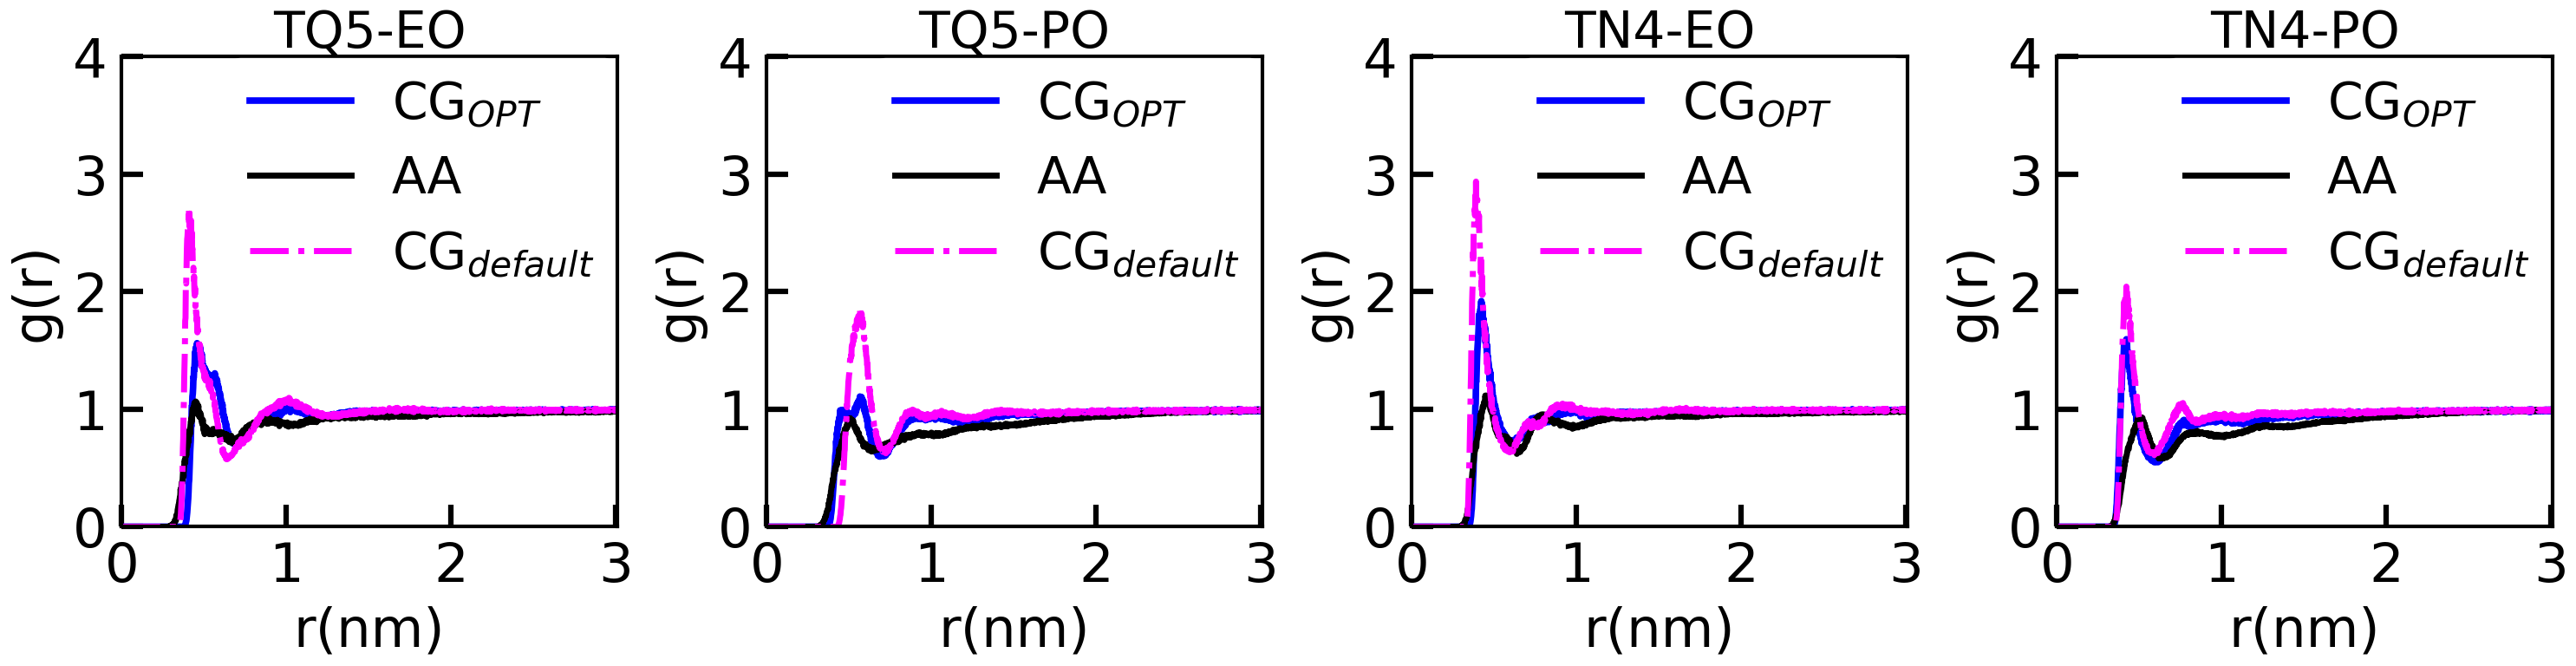

In [28]:
# plot everything
### gofr for all combination beads
a = 1; b =4; c = 1 # initialize plot counter
fig = plt.figure(figsize=(30,8))
from pylab import*
rc('axes', linewidth=3.0)
diff = []
di = []
for i in range(0,4):
        print(i)
        diff = (gofr[i] - gofr_beads[i]).mean()
        di.append(diff)
#for i in range(0,6):
#        print(i)
        plt.subplot(a,b,c)
        c += 1
        plt.ylabel('g(r)', fontsize=45, labelpad=10,  fontname='sans-serif')
        plt.xlabel('r(nm)',fontsize=45,labelpad=10, fontname='sans-serif' )
        ##plt.title('gofr for {} beads'.format(bead_names[i]), fontsize=30)
        ##plt.title(format(di[i], ".4f"), y=0.5, pad=-14, fontsize=40)
        plt.ylim([0, 4])
        plt.xlim([0, 3.01])
        plt.tick_params(axis='both', which='major', length=18, direction='in', width=4.5, labelsize=45, pad=12)
        plt.plot(cutoff_dis[i], gofr_beads[i], linewidth=5.5,color='blue',label="CG$_{OPT}$" )
        plt.plot(cutoff[i], gofr[i], linewidth=5.0,color='black', label="AA")
        plt.plot(cutoff2[i], gofr2[i], linewidth=5.0,color='magenta', label="CG$_{default}$",linestyle='-.' )
        ax = plt.gca()
        ax.text(0.5, 1.05, '{}'.format(bead_names[i]), transform=ax.transAxes, fontsize=42, ha='center', va='center')
        ax.set_xticks(np.arange(0, 3.01, 1))
        plt.legend(fontsize=42, bbox_to_anchor=(1.045,1.05), loc='upper right', edgecolor='white')
fig.tight_layout()
fig.savefig("Figure3A-final.png", dpi=500, transparent=True, )
plt.show()  